In [1]:
import math
import numpy as np
from diffusions_maps import diffusion_map
from noise_dim import add_noise_dim
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib inline
plt.rcParams['figure.dpi'] = 50 # For memory saving purposes



import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

## Generating Swiss roll dataset

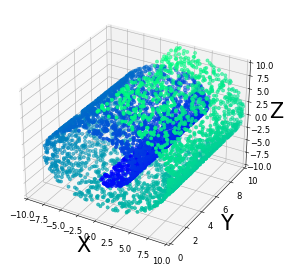

In [2]:
N_1 = 5000
#N_2 = 1000
X_es1, t1 = make_swiss_roll(N_1, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X1 = X_es1[:, 0]
Y1 = X_es1[:, 1]
Z1 = X_es1[:, 2]
X1, Y1, Z1 = 10*X1/np.max(X1), 10*Y1/np.max(Y1), 10*Z1/np.max(Z1)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X1, Y1, Z1, c=t1, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

plt.show()

## Plotting Eigen functions against each other

In [42]:
num_values_1 = 10
λ_1, Φ_1 = diffusion_map(X_es1, num_values_1)
print(f'λ of shape {np.shape(λ_1)} and values: \n \n {λ_1}')

λ of shape (10,) and values: 
 
 [0.99644983 0.99656431 0.99712197 0.99750255 0.99770489 0.9977625
 0.99876528 0.99944838 0.99986369 1.        ]


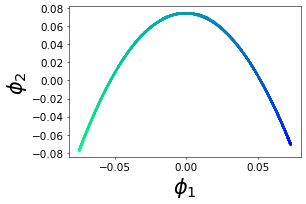

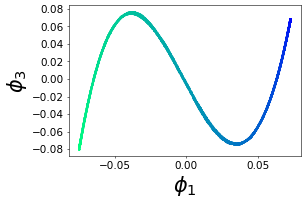

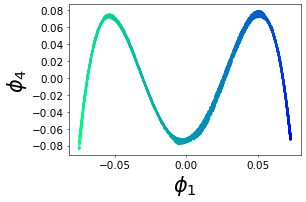

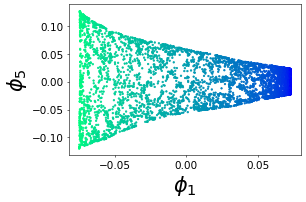

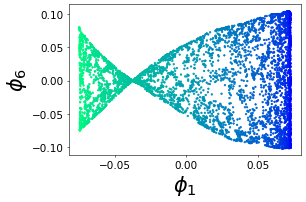

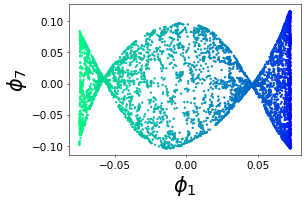

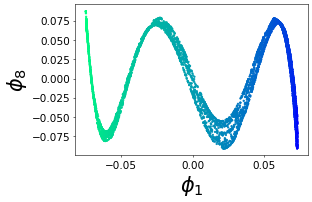

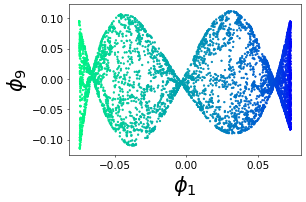

In [43]:
Φ_1_flipped = np.fliplr(Φ_1) # Flip to get in order of decending λ
hor_axis_eigen = Φ_1_flipped.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_1_flipped[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Using datafold to get the plots

In [44]:
data = np.column_stack((X1, Y1, Z1))

X_pcm = pfold.PCManifold(data)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.2939699141674344, cut-off = 2.3270423153018487


In [45]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

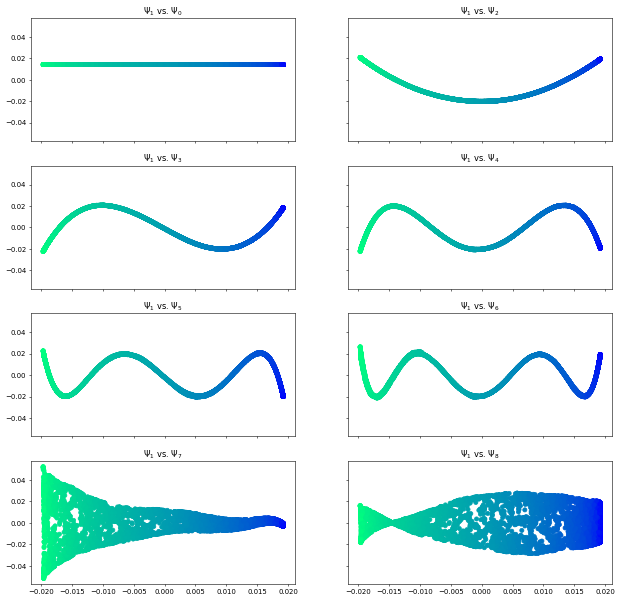

In [46]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(c=t1, cmap='winter'),
)

## PCA analysis on the Swiss-roll dataset

In [47]:
data = np.column_stack((X1, Y1, Z1))
pca = PCA(n_components=3)
pca.fit(data)
reduced = pca.transform(data)

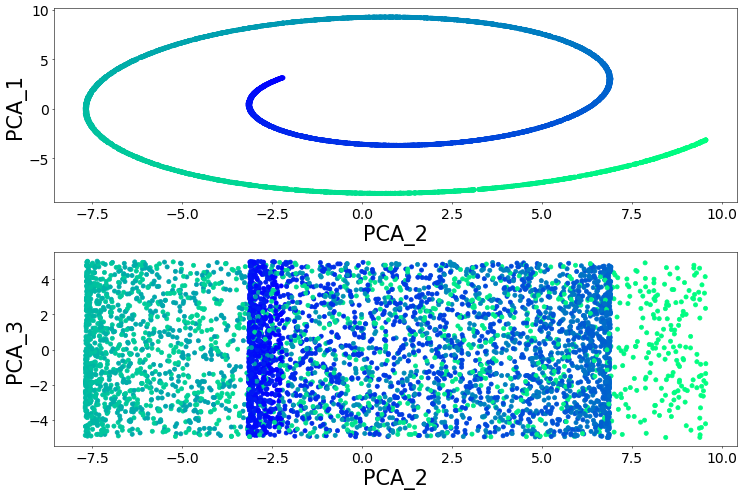

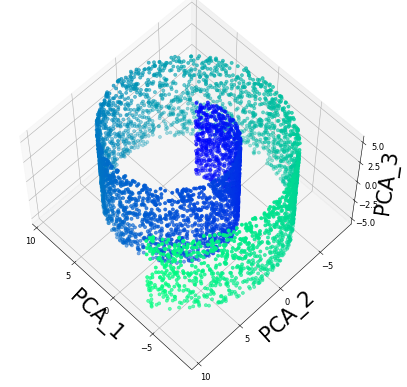

In [48]:
# Visualise
fig1, ax1 = plt.subplots(2,1,figsize=(15,10))

ax1[0].scatter(reduced[:,1], reduced[:,0], c=t1, cmap='winter')
ax1[0].tick_params(axis='x', labelsize=20)
ax1[0].tick_params(axis='y', labelsize=20)
ax1[0].set_xlabel("PCA_2", fontsize = 30)
ax1[0].set_ylabel("PCA_1", fontsize = 30)

ax1[1].scatter(reduced[:,1], reduced[:,2], c=t1, cmap='winter')
ax1[1].tick_params(axis='x', labelsize=20)
ax1[1].tick_params(axis='y', labelsize=20)
ax1[1].set_xlabel("PCA_2", fontsize = 30)
ax1[1].set_ylabel("PCA_3", fontsize = 30)

fig1.tight_layout()

fig2 = plt.figure(figsize=(10, 15))
ax2 = fig2.add_subplot(211, projection='3d')

ax2.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=t1, cmap='winter')
ax2.tick_params(labelsize = 'larger')
plt.locator_params(nbins=5)
ax2.set_xlabel("PCA_1", fontsize = 30)
ax2.set_ylabel("PCA_2", fontsize = 30)
ax2.set_zlabel("PCA_3", fontsize = 30)

ax2.view_init(60, 135)

fig2.tight_layout()

## Generating S-curve dataset

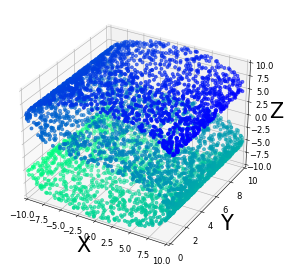

In [49]:
N_2 = 5000
#N_2 = 1000
X_es2, t2 = make_s_curve(N_2, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X2 = X_es2[:, 0]
Y2 = X_es2[:, 1]
Z2 = X_es2[:, 2]
X2, Y2, Z2 = 10*X2/np.max(X2), 10*Y2/np.max(Y2), 10*Z2/np.max(Z2)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X2, Y2, Z2, c=t2, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

plt.show()

In [50]:
num_values_2 = 10
λ_2, Φ_2 = diffusion_map(X_es2, num_values_2)
print(f'λ of shape {np.shape(λ_2)} and values: \n \n {λ_2}')

λ of shape (10,) and values: 
 
 [0.66018137 0.69654678 0.71698529 0.74508655 0.76004528 0.79923392
 0.88063601 0.94527914 0.98628597 1.        ]


## Plotting Eigen functions against each other

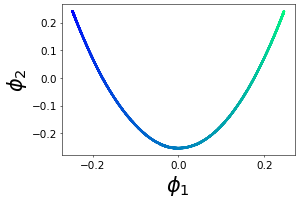

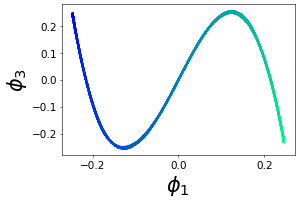

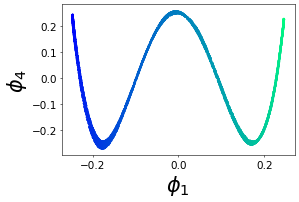

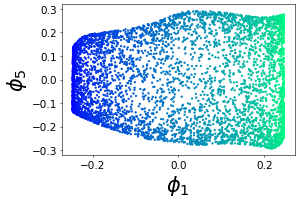

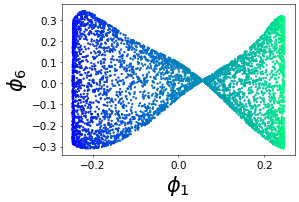

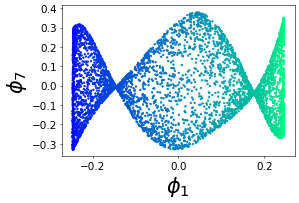

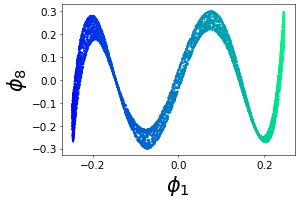

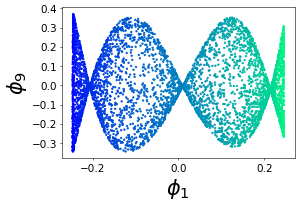

In [51]:
Φ_2_flipped = np.fliplr(Φ_2) # Flip to get in order of decending λ
hor_axis_eigen = Φ_2_flipped.T[1]
for i in range(2, num_values_2):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_2_flipped[:,i], s=5, c=t2, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Using datafold to get the plots

In [52]:
data = np.column_stack((X2, Y2, Z2))

X_pcm = pfold.PCManifold(data)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.18547843223473817, cut-off = 1.8484152631605582


In [53]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

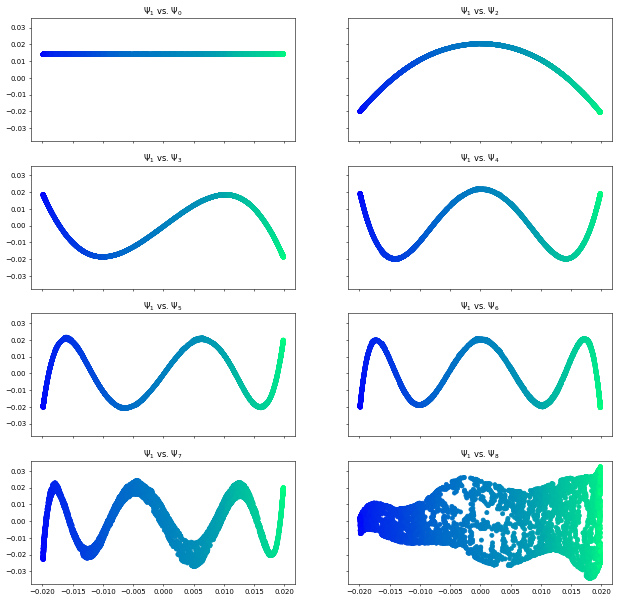

In [54]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(c=t2, cmap='winter'),
)

## PCA analysis on the Swiss-roll dataset

In [55]:
data = np.column_stack((X2, Y2, Z2))
pca = PCA(n_components=3)
pca.fit(data)
reduced = pca.transform(data)

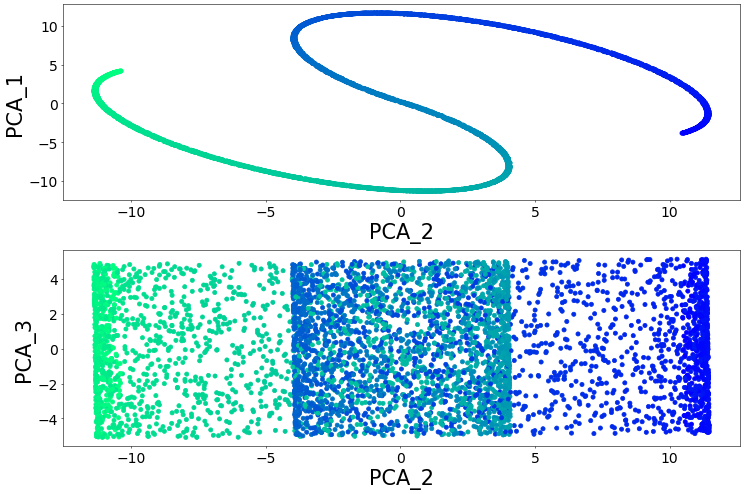

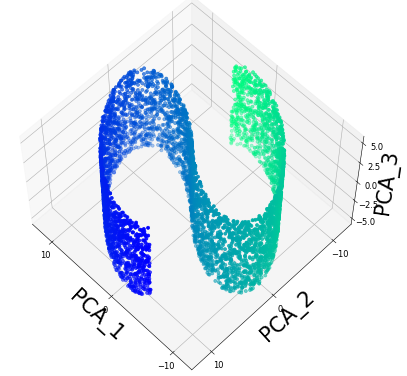

In [56]:
# Visualise
fig1, ax1 = plt.subplots(2,1,figsize=(15,10))

ax1[0].scatter(reduced[:,1], reduced[:,0], c=t2, cmap='winter')
ax1[0].tick_params(axis='x', labelsize=20)
ax1[0].tick_params(axis='y', labelsize=20)
ax1[0].set_xlabel("PCA_2", fontsize = 30)
ax1[0].set_ylabel("PCA_1", fontsize = 30)

ax1[1].scatter(reduced[:,1], reduced[:,2], c=t2, cmap='winter')
ax1[1].tick_params(axis='x', labelsize=20)
ax1[1].tick_params(axis='y', labelsize=20)
ax1[1].set_xlabel("PCA_2", fontsize = 30)
ax1[1].set_ylabel("PCA_3", fontsize = 30)

fig1.tight_layout()

fig2 = plt.figure(figsize=(10, 15))
ax2 = fig2.add_subplot(211, projection='3d')

ax2.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=t2, cmap='winter')
ax2.tick_params(labelsize = 'larger')
plt.locator_params(nbins=5)
ax2.set_xlabel("PCA_1", fontsize = 30)
ax2.set_ylabel("PCA_2", fontsize = 30)
ax2.set_zlabel("PCA_3", fontsize = 30)

ax2.view_init(60, 135)

fig2.tight_layout()